# Cross-Correlation example

Task:
- Load in the dataset: xy
- select one/ten year(s)/days of data
- correlate one day/year with a year/the whole datarange


# Though about correlating wave heights with wind speed and maybe temperature?

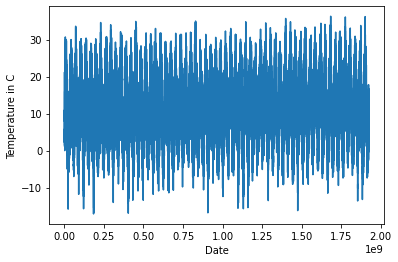

In [30]:
import numpy as num
import matplotlib.pyplot as plt
from scipy import signal

import pandas as pd

# file = 'data/NY_climate_2010_modified.csv'
file = 'data/hourly_data_modified.txt' # https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/

data = pd.read_csv(file)

tempcol = 'TT_TU'
# tempcol = 'HLY-TEMP-NORMAL'

timecol = 'seconds'
#timecol = 'datetime'

xdata = data[timecol]
ydata = data[tempcol]

plt.figure()
plt.plot(xdata, ydata)
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()

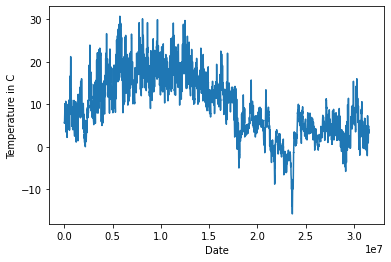

In [40]:
numyears = 1
idxyear = int(24*365 * numyears)


xdata2 = data[timecol][:idxyear]
ydata2 = data[tempcol][:idxyear]

#xdata2 = data[timecol][-idxyear:]
#ydata2 = data[tempcol][-idxyear:]

plt.figure()
plt.plot(xdata2, ydata2)
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()

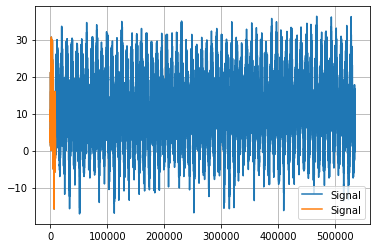

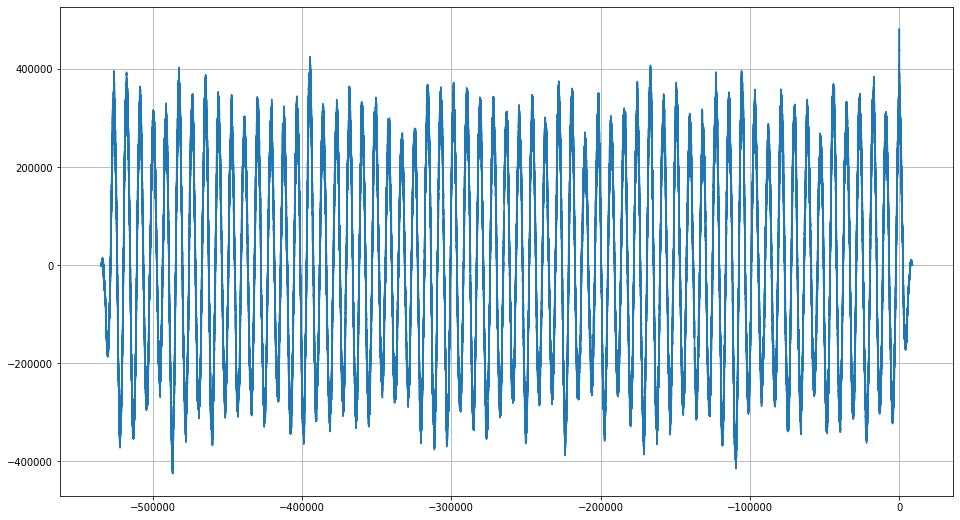

In [41]:
#ydata -= num.mean(ydata)

plt.figure()
plt.plot(ydata, label='Signal')
plt.plot(ydata2, label='Signal')
plt.legend()
plt.grid()
plt.show()

corr = signal.correlate(ydata2  - num.mean(ydata2), ydata - num.mean(ydata))
lags = signal.correlation_lags(len(ydata2), len(ydata))

plt.figure(figsize=(16,9))
plt.plot(lags, corr)
plt.grid()
plt.show()